In [1]:
import numpy as np
import pyclesperanto_prototype as cle
from skimage.io import imread, imsave
from skimage.measure import regionprops, regionprops_table
from skimage.util import map_array
from napari_simpleitk_image_processing import label_statistics
import matplotlib.pyplot as plt

binary = cle.artificial_objects_2d()
labels = cle.voronoi_otsu_labeling(binary, spot_sigma=5)

statistics_table = regionprops_table(cle.pull(labels), properties=('label', 'area',))
remapped = map_array(
        cle.pull(labels),
        statistics_table['label'],
        statistics_table['area'],
        )

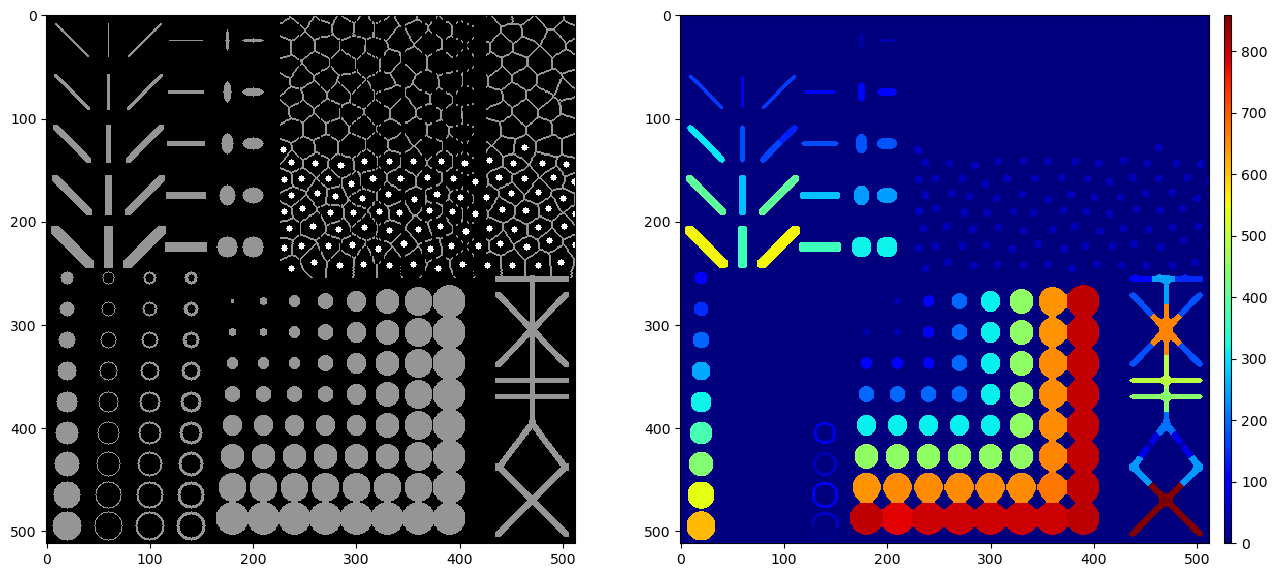

In [8]:
# Normal subplots using the imshow() method-Doesn't work!
fig1, axs1 = plt.subplots(1, 2, figsize=(15,15))
cle.imshow(binary, plot=axs1[0])
cle.imshow(remapped, colorbar=True, colormap="jet", plot=axs1[1])